# 1. Imports

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/co2-prediction-dataset/Train.csv
/kaggle/input/co2-prediction-dataset/Test.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import random

seed = 845
random.seed(seed)
np.random.seed(seed)

In [4]:
train = pd.read_csv('/kaggle/input/co2-prediction-dataset/Train.csv')
test = pd.read_csv('/kaggle/input/co2-prediction-dataset/Test.csv')

train_copy = train.copy()
test_copy = test.copy()

In [5]:
train.tail(10)

ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
73995  ID_-33.93_25.67_2022_40    -33.93      25.67  2022       40   
73996  ID_-33.93_25.67_2022_41    -33.93      25.67  2022       41   
73997  ID_-33.93_25.67_2022_42    -33.93      25.67  2022       42   
73998  ID_-33.93_25.67_2022_43    -33.93      25.67  2022       43   
73999  ID_-33.93_25.67_2022_44    -33.93      25.67  2022       44   
74000  ID_-33.93_25.67_2022_45    -33.93      25.67  2022       45   
74001  ID_-33.93_25.67_2022_46    -33.93      25.67  2022       46   
74002  ID_-33.93_25.67_2022_47    -33.93      25.67  2022       47   
74003  ID_-33.93_25.67_2022_48    -33.93      25.67  2022       48   
74004  ID_-33.93_25.67_2022_52    -33.93      25.67  2022       52   

       SulphurDioxide_SO2_column_number_density  \
73995                                 -0.000149   
73996                                  0.000200   
73997                                  0.000348   
73998                                  0.000131   
73999                                 -0.000045   
74000                                  0.001192   
74001                                  0.000196   
74002                                  0.000114   
74003                                  0.000092   
74004                                  0.000630   

       SulphurDioxide_SO2_column_number_density_amf  \
73995                                      0.609458   
73996                                      0.508878   
73997                                      0.367644   
73998                                      0.591156   
73999                                      0.487801   
74000                                      0.322510   
74001                                      0.393484   
74002                                      0.445499   
74003                                      0.377850   
74004                                      0.306275   

       SulphurDioxide_SO2_slant_column_number_density  \
73995                                       -0.000100   
73996                                        0.000102   
73997                                        0.000119   
73998                                        0.000081   
73999                                       -0.000026   
74000                                        0.000358   
74001                                        0.000081   
74002                                        0.000054   
74003                                        0.000035   
74004                                        0.000148   

       SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
73995                       0.058038                            12.058772   
73996                       0.176190                            76.750587   
73997                       0.105165                           -15.520863   
73998                       0.131979                           -58.892293   
73999                       0.048319                            40.289887   
74000                       0.113889                           -95.875226   
74001                       0.095715                          -104.357543   
74002                       0.007275                            76.966014   
74003                       0.077744                           -12.476655   
74004                       0.050941                           -11.587875   

       ...  Cloud_cloud_top_height  Cloud_cloud_base_pressure  \
73995  ...             6174.346100               56910.925272   
73996  ...             5565.660494               60367.230003   
73997  ...             1485.299674               96443.056281   
73998  ...             3198.924707               82131.814889   
73999  ...             7492.379566               48463.009199   
74000  ...             6380.936608               54160.486756   
74001  ...             6080.303261               56345.002370   
74002  ...             1478.970433               95206.933265   
74003  ...

In [6]:
train.describe(include="all")

ID_LAT_LON_YEAR_WEEK      latitude     longitude          year  \
count                    74005  74005.000000  74005.000000  74005.000000   
unique                   74005           NaN           NaN           NaN   
top     ID_-23.73_28.77_2019_1           NaN           NaN           NaN   
freq                         1           NaN           NaN           NaN   
mean                       NaN    -27.829723     27.782742   2020.478049   
std                        NaN      2.760589      2.746672      1.111261   
min                        NaN    -33.930000     21.070000   2019.000000   
25%                        NaN    -29.630000     26.670000   2019.000000   
50%                        NaN    -28.130000     28.770000   2020.000000   
75%                        NaN    -25.730000     29.470000   2021.000000   
max                        NaN    -23.730000     31.170000   2022.000000   

             week_no  SulphurDioxide_SO2_column_number_density  \
count   74005.000000                              72075.000000   
unique           NaN                                       NaN   
top              NaN                                       NaN   
freq             NaN                                       NaN   
mean       26.156098                                  0.000263   
std        14.843840                                  0.000599   
min         1.000000                                 -0.000989   
25%        13.000000                                 -0.000066   
50%        26.000000                                  0.000147   
75%        39.000000                                  0.000441   
max        52.000000                                  0.009526   

        SulphurDioxide_SO2_column_number_density_amf  \
count                                   72075.000000   
unique                                           NaN   
top                                              NaN   
freq                                             NaN   
mean                                        0.515875   
std                                         0.196766   
min                                         0.133738   
25%                                         0.371745   
50%                                         0.488695   
75%                                         0.623530   
max                                         1.673412   

        SulphurDioxide_SO2_slant_column_number_density  \
count                                     72075.000000   
unique                                             NaN   
top                                                NaN   
freq                                               NaN   
mean                                          0.000091   
std                                           0.000199   
min                                          -0.000828   
25%                                          -0.000034   
50%                                           0.000073   
75%                                           0.000191   
max                                           0.001871   

        SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
count                    72075.000000                         72075.000000   
unique                            NaN                                  NaN   
top                               NaN                                  NaN   
freq                              NaN                                  NaN   
mean                         0.105690                             4.487627   
std                          0.069555                            52.246537   
min                          0.000000                          -110.027657   
25%                          0.052482                           -18.178128   
50%                          0.099513                           -10.987544   
75%                          0.152480                            59.119988   
max                          0.299987                            83.743980  

In [7]:
test.describe(include="all")

ID_LAT_LON_YEAR_WEEK      latitude     longitude          year  \
count                    28085  28085.000000  28085.000000  28085.000000   
unique                   28085           NaN           NaN           NaN   
top     ID_-23.53_27.47_2019_1           NaN           NaN           NaN   
freq                         1           NaN           NaN           NaN   
mean                       NaN    -27.659927     27.679489   2020.478049   
std                        NaN      3.147071      3.953095      1.111273   
min                        NaN    -34.030000     18.370000   2019.000000   
25%                        NaN    -28.130000     27.670000   2019.000000   
50%                        NaN    -27.730000     29.770000   2020.000000   
75%                        NaN    -24.030000     30.070000   2021.000000   
max                        NaN    -23.530000     30.370000   2022.000000   

             week_no  SulphurDioxide_SO2_column_number_density  \
count   28085.000000                              27168.000000   
unique           NaN                                       NaN   
top              NaN                                       NaN   
freq             NaN                                       NaN   
mean       26.156098                                  0.000408   
std        14.844004                                  0.000694   
min         1.000000                                 -0.000997   
25%        13.000000                                  0.000004   
50%        26.000000                                  0.000256   
75%        39.000000                                  0.000632   
max        52.000000                                  0.006876   

        SulphurDioxide_SO2_column_number_density_amf  \
count                                   27168.000000   
unique                                           NaN   
top                                              NaN   
freq                                             NaN   
mean                                        0.479412   
std                                         0.185203   
min                                         0.136354   
25%                                         0.334740   
50%                                         0.456401   
75%                                         0.579827   
max                                         1.460635   

        SulphurDioxide_SO2_slant_column_number_density  \
count                                     27168.000000   
unique                                             NaN   
top                                                NaN   
freq                                               NaN   
mean                                          0.000147   
std                                           0.000235   
min                                          -0.000827   
25%                                           0.000002   
50%                                           0.000117   
75%                                           0.000253   
max                                           0.003544   

        SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
count                    27168.000000                         27168.000000   
unique                            NaN                                  NaN   
top                               NaN                                  NaN   
freq                              NaN                                  NaN   
mean                         0.109034                             3.593182   
std                          0.070031                            50.977486   
min                          0.000000                          -106.342976   
25%                          0.054825                           -18.052725   
50%                          0.103155                           -11.306408   
75%                          0.158492                            56.920923   
max                          0.299744                            83.451178  

# 2. Missing Values

### 2.1 Get percentage of missing values

In [8]:
total_missing = train.isnull().sum().sum()
total_entries = train.size
overall_missing_percentage = (total_missing / total_entries) * 100
overall_missing_percentage

10.097788556249755

In [10]:
total_missing = test.isnull().sum().sum()
total_entries = test.size
overall_missing_percentage = (total_missing / total_entries) * 100
overall_missing_percentage

10.174683995015133

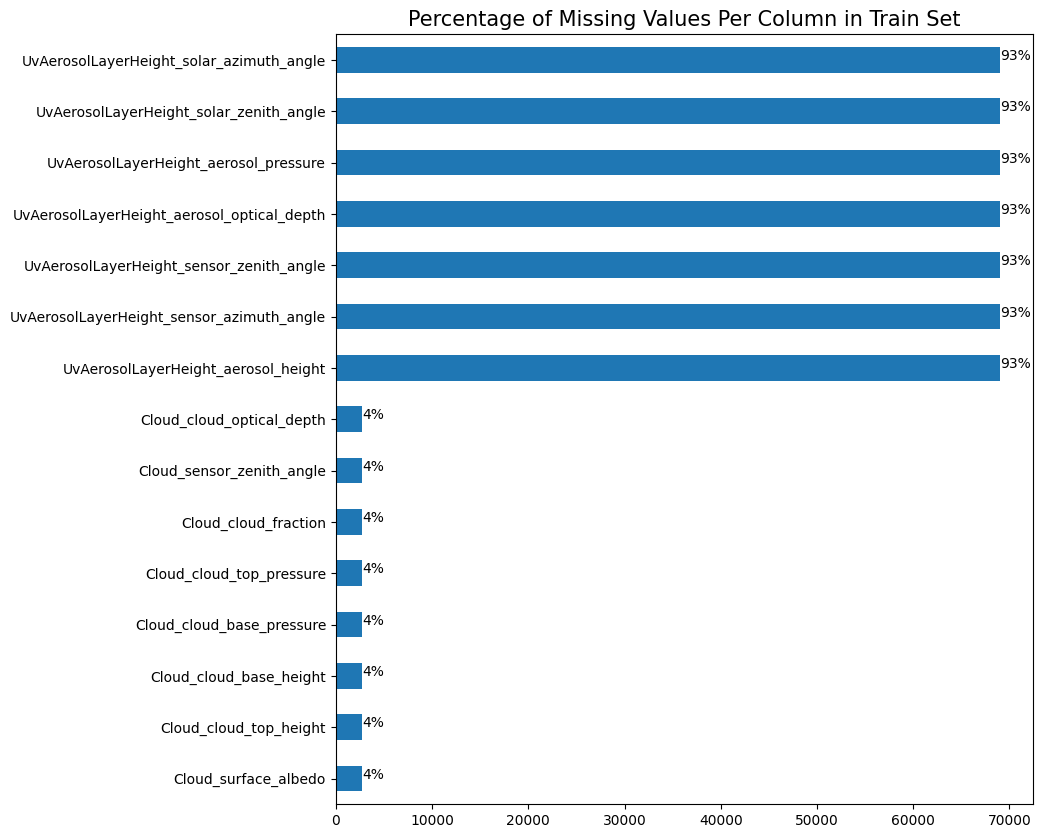

In [9]:
import matplotlib.pyplot as plt

ax = train.isna().sum().sort_values(ascending = False)[:15][::-1].plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

# 3. Exploring the Data

### 3.1 Yearly Emissions

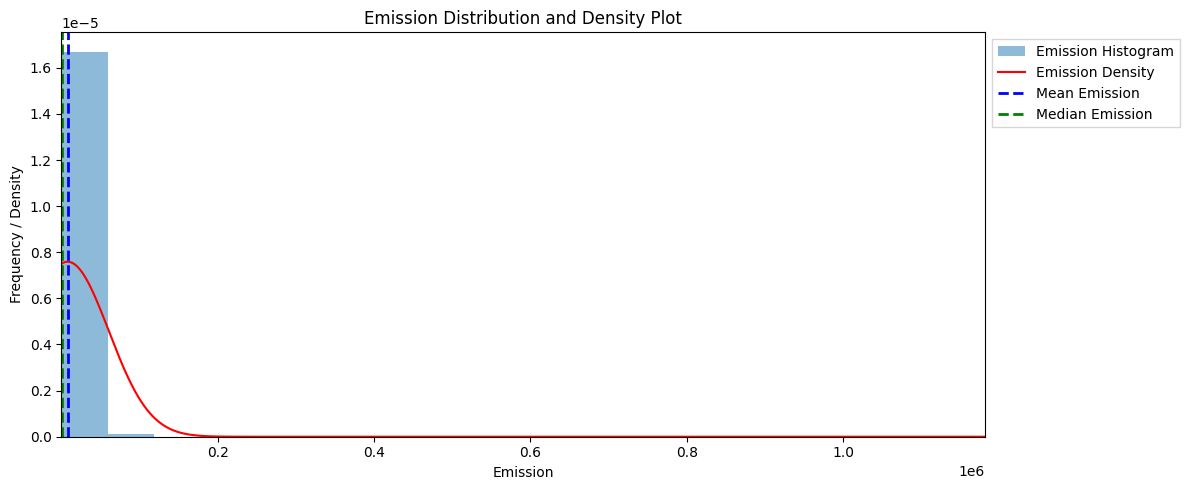

In [11]:
emission = train['emission']

mean_emission = np.mean(emission)
median_emission = np.median(emission)

fig, ax = plt.subplots(figsize=(12, 5))

ax.hist(emission, bins=20, density=True, alpha=0.5, label='Emission Histogram')

x_values = np.linspace(emission.min(), emission.max(), len(emission))
density_values = (1 / (np.sqrt(2 * np.pi) * np.std(emission))) * np.exp(-0.5 * ((x_values - mean_emission) / np.std(emission))**2)
ax.plot(x_values, density_values, color='red', label='Emission Density')

ax.axvline(mean_emission, color='blue', linestyle='dashed', linewidth=2, label='Mean Emission')
ax.axvline(median_emission, color='green', linestyle='dashed', linewidth=2, label='Median Emission')

ax.set_xlabel('Emission')
ax.set_ylabel('Frequency / Density')
ax.set_title('Emission Distribution and Density Plot')

x_min = emission.min()
x_max = emission.max()
ax.set_xlim([x_min, x_max])

ax.legend(bbox_to_anchor=(1, 1), fancybox=False, shadow=False, loc='upper left')

plt.tight_layout()
plt.show()

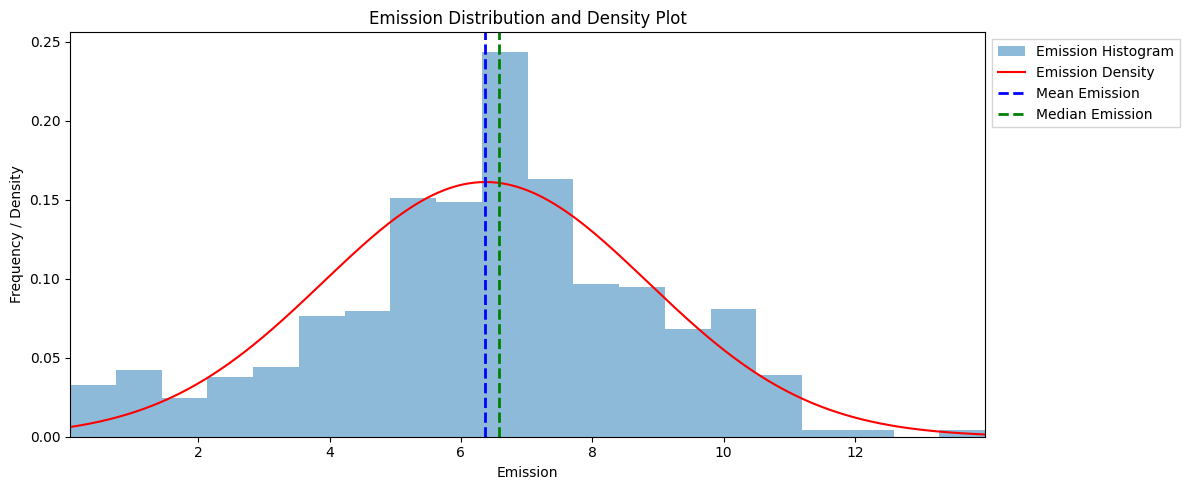

In [12]:
emission = np.log1p(train['emission'])

mean_emission = np.mean(emission)
median_emission = np.median(emission)

fig, ax = plt.subplots(figsize=(12, 5))

ax.hist(emission, bins=20, density=True, alpha=0.5, label='Emission Histogram')

x_values = np.linspace(emission.min(), emission.max(), len(emission))
density_values = (1 / (np.sqrt(2 * np.pi) * np.std(emission))) * np.exp(-0.5 * ((x_values - mean_emission) / np.std(emission))**2)
ax.plot(x_values, density_values, color='red', label='Emission Density')

ax.axvline(mean_emission, color='blue', linestyle='dashed', linewidth=2, label='Mean Emission')
ax.axvline(median_emission, color='green', linestyle='dashed', linewidth=2, label='Median Emission')

ax.set_xlabel('Emission')
ax.set_ylabel('Frequency / Density')
ax.set_title('Emission Distribution and Density Plot')

x_min = emission.min()
x_max = emission.max()
ax.set_xlim([x_min, x_max])

ax.legend(bbox_to_anchor=(1, 1), fancybox=False, shadow=False, loc='upper left')

plt.tight_layout()
plt.show()

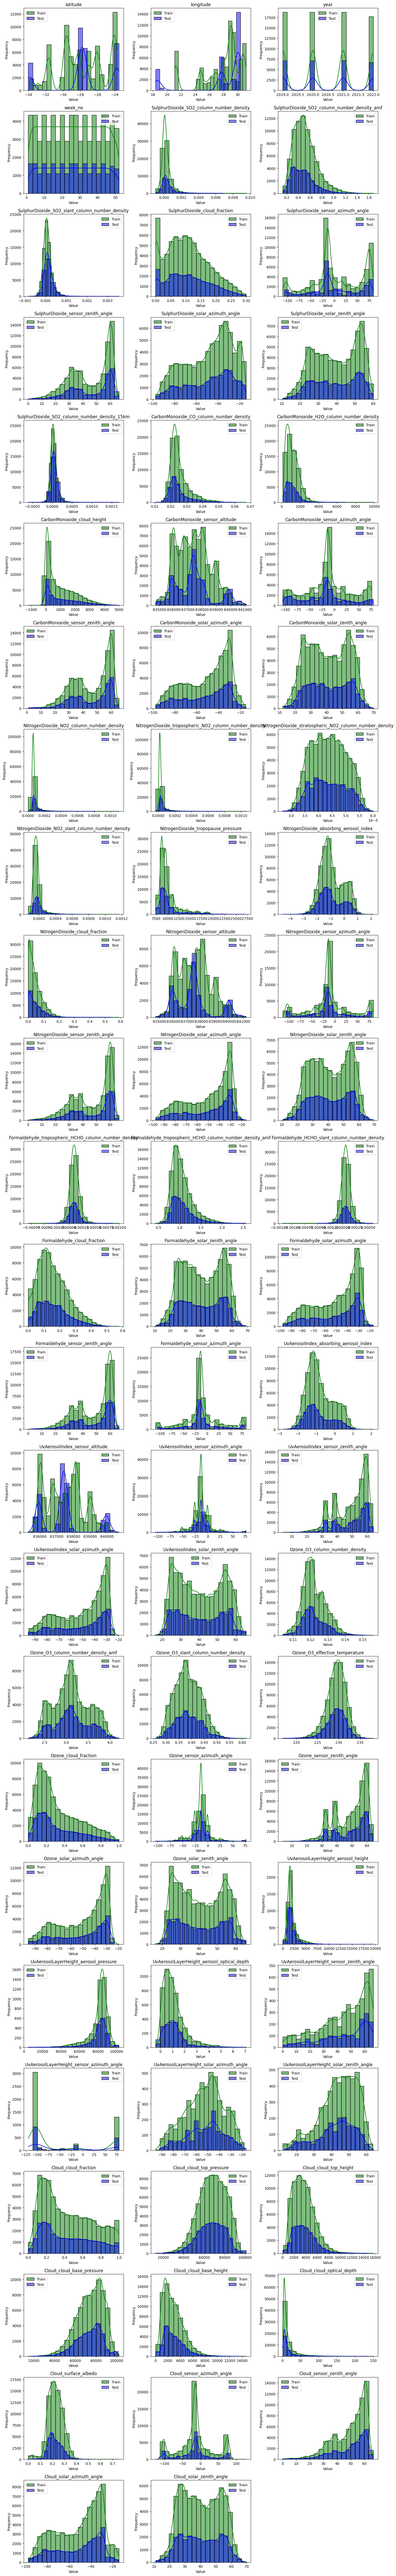

In [13]:
cont_cols=[f for f in train.columns if train[f].dtype in [float,int] and train[f].nunique()>2 and f not in ['emission']]

# Calculate the number of rows needed for the subplots
num_rows = (len(cont_cols) + 2) // 3

# Create subplots for each continuous column
fig, axs = plt.subplots(num_rows, 3, figsize=(15, num_rows*4))

# Loop through each continuous column and plot the histograms
for i, col in enumerate(cont_cols):
    # Determine the range of values to plot
    max_val = max(train[col].max(), test[col].max())
    min_val = min(train[col].min(), test[col].min())
    range_val = max_val - min_val
    
    # Determine the bin size and number of bins
    bin_size = range_val / 20
    num_bins_train = round(range_val / bin_size)
    num_bins_test = round(range_val / bin_size)
    
    # Calculate the subplot position
    row = i // 3
    col_pos = i % 3
    
    # Plot the histograms
    sns.histplot(train[col], ax=axs[row][col_pos], color='green', kde=True, label='Train', bins=num_bins_train)
    sns.histplot(test[col], ax=axs[row][col_pos], color='blue', kde=True, label='Test', bins=num_bins_test)
    axs[row][col_pos].set_title(col)
    axs[row][col_pos].set_xlabel('Value')
    axs[row][col_pos].set_ylabel('Frequency')
    axs[row][col_pos].legend()

# Remove any empty subplots
if len(cont_cols) % 3 != 0:
    for col_pos in range(len(cont_cols) % 3, 3):
        axs[-1][col_pos].remove()

plt.tight_layout()
plt.show()

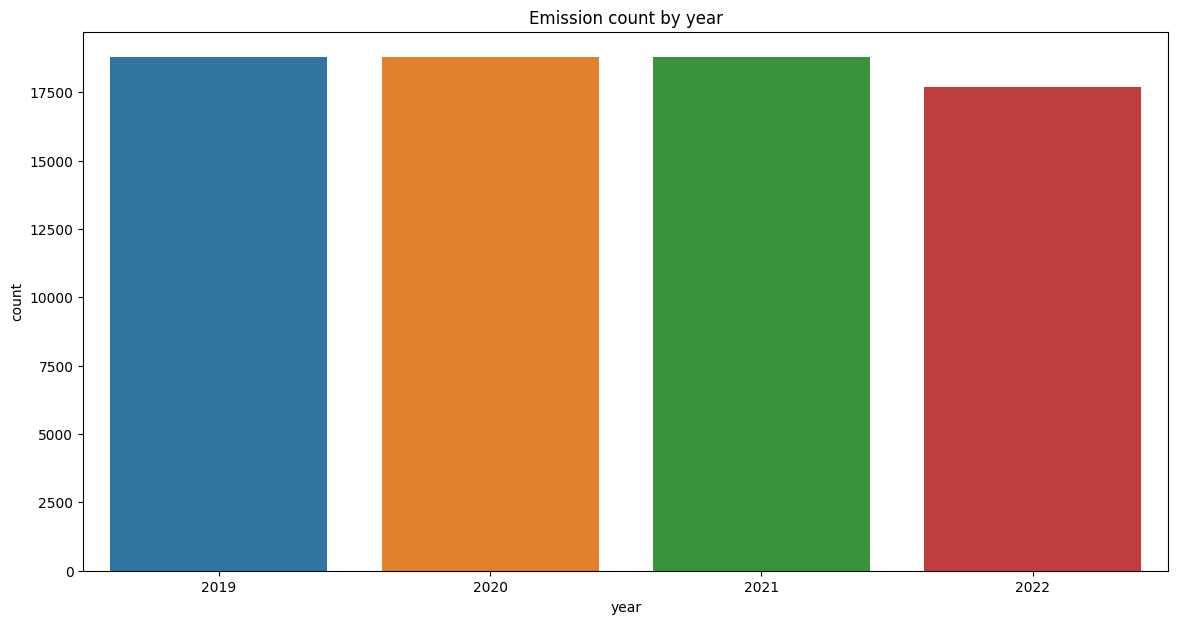

In [14]:
plt.figure(figsize=(14, 7))
sns.countplot(x='year', data=train)
plt.title('Emission count by year')
plt.show()

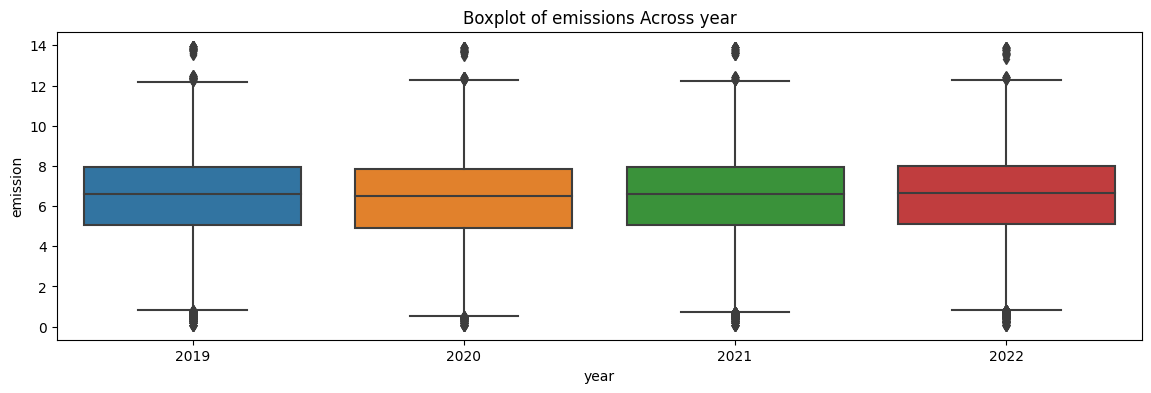

In [15]:
fig, ax = plt.subplots(figsize=(14, 4))
data=train.copy()
data['emission']=np.log1p(data['emission'])
sns.boxplot(x='year', y='emission', data=data, ax=ax)
ax.set_title(f'Boxplot of emissions Across year')
plt.show()

### 3.2 Weekly Emission count

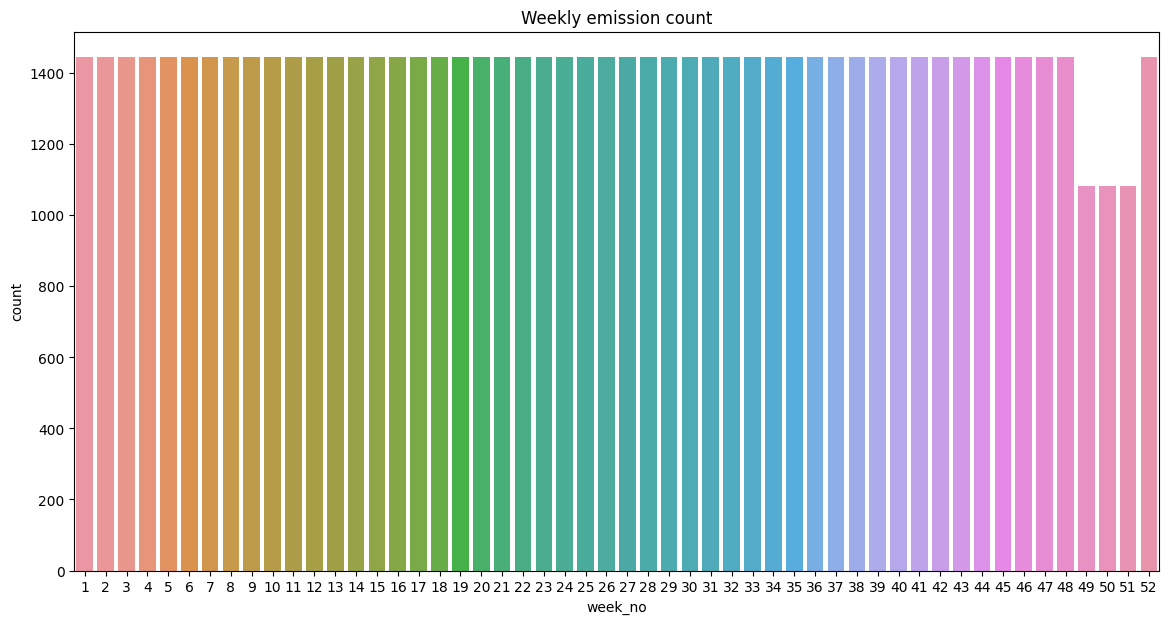

In [16]:
plt.figure(figsize=(14, 7))
sns.countplot(x='week_no', data=train)
plt.title('Weekly emission count')
plt.show()

### 3.3 Time Series Analysis

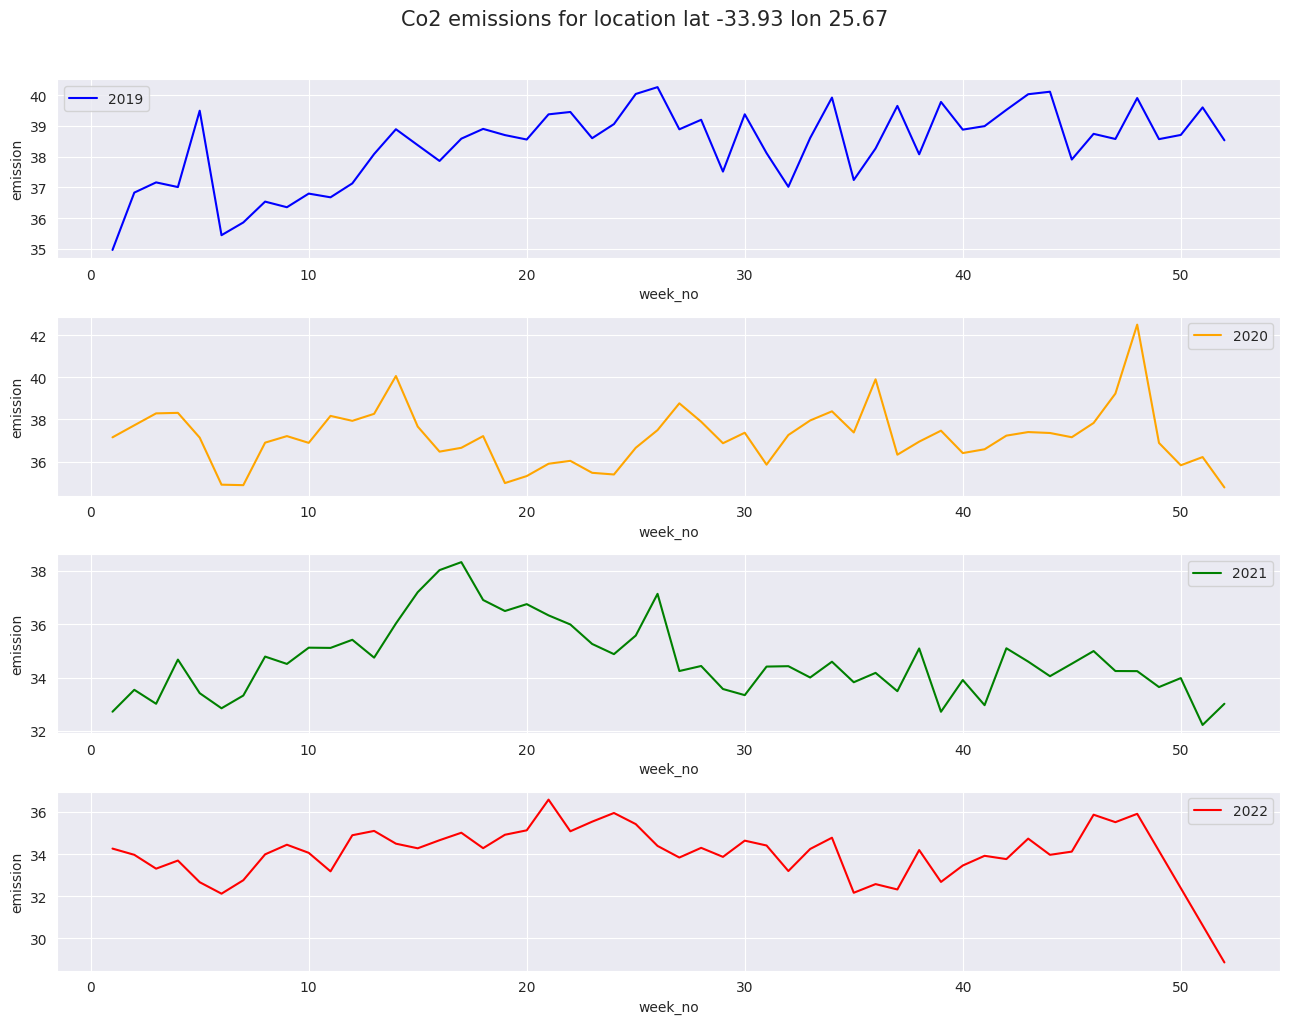

In [17]:
# Sample a unique location and visualize its emissions across the years
train.latitude, train.longitude = round(train.latitude, 2), round(train.longitude, 2)
sample_loc = train[(train.latitude == -33.93) & (train.longitude == 25.67)]

# Plot a line plot
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 4, ncols = 1, figsize = (13, 10))
fig.suptitle('Co2 emissions for location lat -33.93 lon 25.67', y=1.02, fontsize = 15)

for ax, data, year, color, in zip(axes.flatten(), sample_loc, sample_loc.year.unique(), ['blue','orange', 'green' , 'red']):
    df = sample_loc[sample_loc.year == year]
    sns.lineplot(x=df.week_no,y= df.emission, ax = ax, label = year, color = color)
plt.legend()
plt.tight_layout()

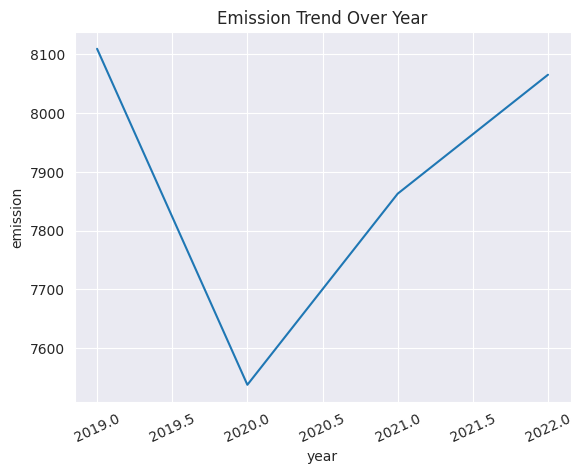

In [18]:
sns.lineplot(data = train, x = 'year', y = 'emission', errorbar = None)
plt.title('Emission Trend Over Year')
plt.xticks(rotation = 25)
plt.show()

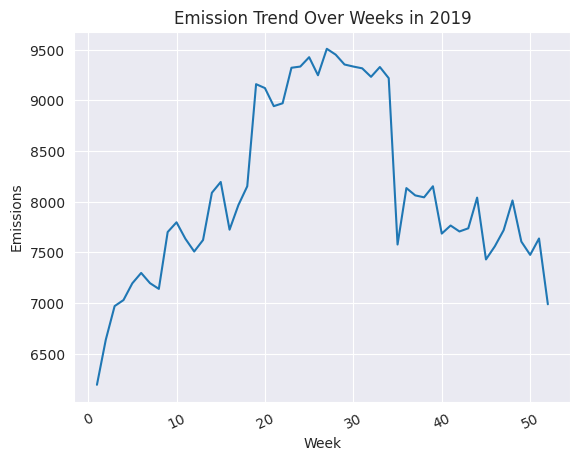

In [19]:
fil_data_2019 = train[train['year'] == 2019]  # Filter data for the year 2020
sns.lineplot(data=fil_data_2019, x='week_no', y='emission', err_style=None)
plt.title('Emission Trend Over Weeks in 2019')
plt.xticks(rotation=25)
plt.xlabel('Week')
plt.ylabel('Emissions')
plt.show()

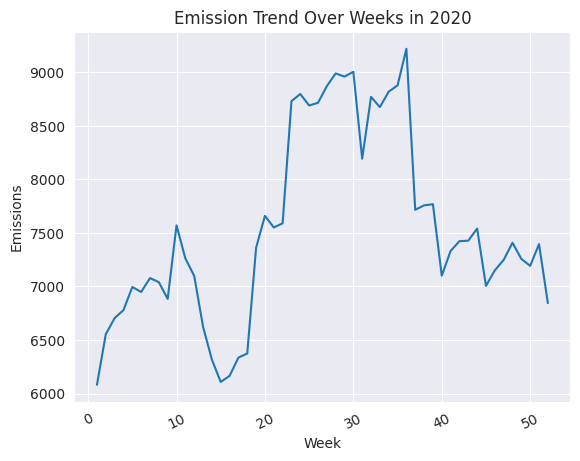

In [20]:
fil_data_2020 = train[train['year'] == 2020]  # Filter data for the year 2020
sns.lineplot(data=fil_data_2020, x='week_no', y='emission', err_style=None)
plt.title('Emission Trend Over Weeks in 2020')
plt.xticks(rotation=25)
plt.xlabel('Week')
plt.ylabel('Emissions')
plt.show()

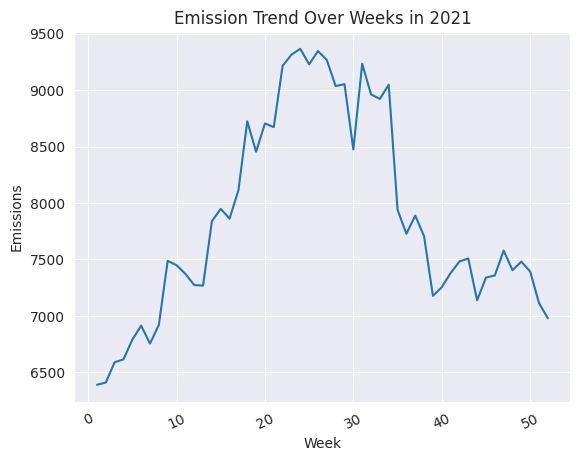

In [21]:
fil_data_2021 = train[train['year'] == 2021]  # Filter data for the year 2020
sns.lineplot(data=fil_data_2021, x='week_no', y='emission', err_style=None)
plt.title('Emission Trend Over Weeks in 2021')
plt.xticks(rotation=25)
plt.xlabel('Week')
plt.ylabel('Emissions')
plt.show()

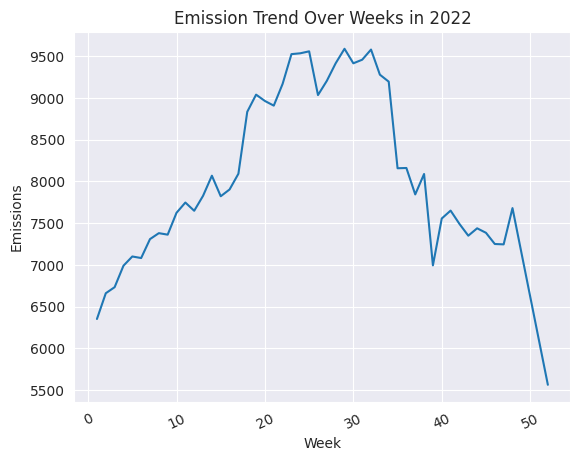

In [22]:
fil_data_2022 = train[train['year'] == 2022]  # Filter data for the year 2020
sns.lineplot(data=fil_data_2022, x='week_no', y='emission', err_style=None)
plt.title('Emission Trend Over Weeks in 2022')
plt.xticks(rotation=25)
plt.xlabel('Week')
plt.ylabel('Emissions')
plt.show()

### Geo Visualization

In [24]:
import geopandas as gpd

# Combine train and test for easy visualisation
train_coords = train.drop_duplicates(subset = ['latitude', 'longitude'])
test_coords = test.drop_duplicates(subset = ['latitude', 'longitude'])
train_coords['set_type'], test_coords['set_type'] = 'train', 'test'

all_data = pd.concat([train_coords, test_coords], ignore_index = True)
# Create point geometries

geometry = gpd.points_from_xy(all_data.longitude, all_data.latitude)
geo_df = gpd.GeoDataFrame(
    all_data[["latitude", "longitude", "set_type"]], geometry=geometry
)

# Preview the geopandas df
geo_df.head()

latitude  longitude set_type                    geometry
0    -23.73      28.77    train  POINT (28.77000 -23.73000)
1    -23.73      28.87    train  POINT (28.87000 -23.73000)
2    -23.73      28.97    train  POINT (28.97000 -23.73000)
3    -23.73      29.07    train  POINT (29.07000 -23.73000)
4    -23.73      29.17    train  POINT (29.17000 -23.73000)

In [25]:
from shapely.geometry import Point
import folium

# Create a canvas to plot your map on
all_data_map = folium.Map(prefer_canvas=True)

# Create a geometry list from the GeoDataFrame
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry]

# Iterate through list and add a marker for each volcano, color-coded by its type.
i = 0
for coordinates in geo_df_list:
    # assign a color marker for the type set
    if geo_df.set_type[i] == "train":
        type_color = "green"
    elif geo_df.set_type[i] == "test":
        type_color = "orange"

    # Place the markers 
    all_data_map.add_child(
        folium.CircleMarker(
            location=coordinates,
            radius = 1,
            weight = 4,
            zoom =10,
            popup= 
            "Set: " + str(geo_df.set_type[i]) + "<br>"
            "Coordinates: " + str([round(x, 2) for x in geo_df_list[i]]),
            color =  type_color),
        )
    i = i + 1
all_data_map.fit_bounds(all_data_map.get_bounds())
all_data_map

# 4. Feature Engineering

### 4.1 Fixing the missing values

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score

In [14]:
X = train.drop(['ID_LAT_LON_YEAR_WEEK', 'emission', 'week_no', 'year'], axis=1)
y = train['emission']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [16]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# 5. Preprocessing

In [17]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# create full pipeline
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=seed))
])



In [18]:
from sklearn.metrics import mean_squared_error, r2_score

# fit the pipeline
full_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = full_pipeline.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

In [19]:
print(f"Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 11586.601741898412
R2 Score: 0.9310287229902394


In [27]:
train.isna().sum()

ID_LAT_LON_YEAR_WEEK             0
latitude                         0
longitude                        0
year                             0
week_no                          0
                              ... 
Cloud_sensor_azimuth_angle    2724
Cloud_sensor_zenith_angle     2724
Cloud_solar_azimuth_angle     2724
Cloud_solar_zenith_angle      2724
emission                         0
Length: 76, dtype: int64

In [ ]:
# # Analyse predictions
# pred_errors = X_test.copy()
# pred_errors['emission'] = y_test
# pred_errors['prediction'] = y_pred
# pred_errors['error'] = abs(pred_errors.prediction - pred_errors.emission)
# pred_errors = pred_errors[['latitude',	'longitude',	'year',	'week_no', 'emission', 'prediction', 'error']]
# pred_errors.sort_values(by = 'error', ascending = False, inplace = True)
# pred_errors.head()

In [ ]:
# pred_errors.tail()

In [ ]:
# Best Root Mean Squared Error: 9757.28268263015
# R2 Score: 0.9510881732981824

# Make prediction on the test set
# test_df = test.drop(columns='ID_LAT_LON_YEAR_WEEK', axis = 1).fillna(0)
# predictions = full_pipeline.predict(test)

# # Create a submission file
# sub_file = pd.DataFrame({'ID_LAT_LON_YEAR_WEEK': test.ID_LAT_LON_YEAR_WEEK, 'emission': predictions})
# sub_file.head()

In [ ]:
# Create file
# sub_file.to_csv('BaselineSubmission-1.csv', index = False)